In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.projections import get_projection_class
from matplotlib.patches import Arc
import matplotlib.patheffects as path_effects

In [8]:
def json_to_normalized_dataframe(path):
    rd = ""
    with open(path, 'r', encoding="UTF-8") as f:
        rd = f.read()
    obj = json.loads(rd)
    df = pd.json_normalize(obj)
    return df


In [9]:
def draw_pitch():
    fig, ax = plt.subplots(figsize = (10.5, 6.8), dpi=300)

    ax.plot([0,0],[0,80], color="black")
    ax.plot([0,120],[80,80], color="black")
    ax.plot([120,120],[80,0], color="black")
    ax.plot([120,0],[0,0], color="black")
    ax.plot([60,60],[0,80], color="black")


    #Left Penalty Area
    ax.plot([18,18],[62,18],color="black")
    ax.plot([0,18],[62,62],color="black")
    ax.plot([18,0],[18,18],color="black")


    #Right Penalty Area
    ax.plot([120,102],[18,18],color="black")
    ax.plot([102,102],[18,62],color="black")
    ax.plot([102,120],[62,62],color="black")
     #Left 6-yard Box
    ax.plot([0,6],[30,30],color="black")
    ax.plot([6,6],[30,50],color="black")
    ax.plot([0,6],[50,50],color="black")
      #Right 6-yard Box
    ax.plot([114,120],[30,30],color="black")
    ax.plot([114,114],[30,50],color="black")
    ax.plot([114,120],[50,50],color="black")


        #Prepare Circles
    centreCircle = plt.Circle((60,40),8.7,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.8,color="black")
    leftPenSpot = plt.Circle((12,40),0.8,color="black")
    rightPenSpot = plt.Circle((108,40),0.8,color="black")


        #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((12,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((108,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Goals
    ax.plot([-3,0],[44,44],color="black")
    ax.plot([-3,-3],[44,36],color="black")
    ax.plot([-3,0],[36,36],color="black")

    ax.plot([123,120],[44,44],color="black")
    ax.plot([123,123],[44,36],color="black")
    ax.plot([123,120],[36,36],color="black")

        #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    ax.set_xticks([])
    ax.set_yticks([])

    return ax


In [10]:
def get_cross_coordinates(df, team_name):
    df_crosses = df[(df_events["pass.cross"] == 1) & (df_events["team.name"] == team_name)]
    
    crosses_x = np.array(range(len(df_crosses)), dtype="float_")
    crosses_y = np.array(range(len(df_crosses)), dtype="float_")
    cross_left = np.array(range(len(df_crosses)), dtype="bool")
    cross_success = np.array(range(len(df_crosses)), dtype="bool")

    for i, location in enumerate(df_crosses["location"]):
        crosses_x[i] = location[0]
        crosses_y[i] = location[1]
        if location[1] > 40:
            cross_left[i] = True
        else:
            cross_left[i] = False
        
    for i, outcome in enumerate(df_crosses["pass.outcome.name"]):
        if outcome == "Incomplete" or outcome == "Out" or outcome == "Pass Offside":
            cross_success[i] = False
        else:
            cross_success[i] = True

    return pd.DataFrame(np.transpose(np.array([crosses_x, crosses_y, cross_left, cross_success])), columns=["x", "y", "left", "successful"])
    


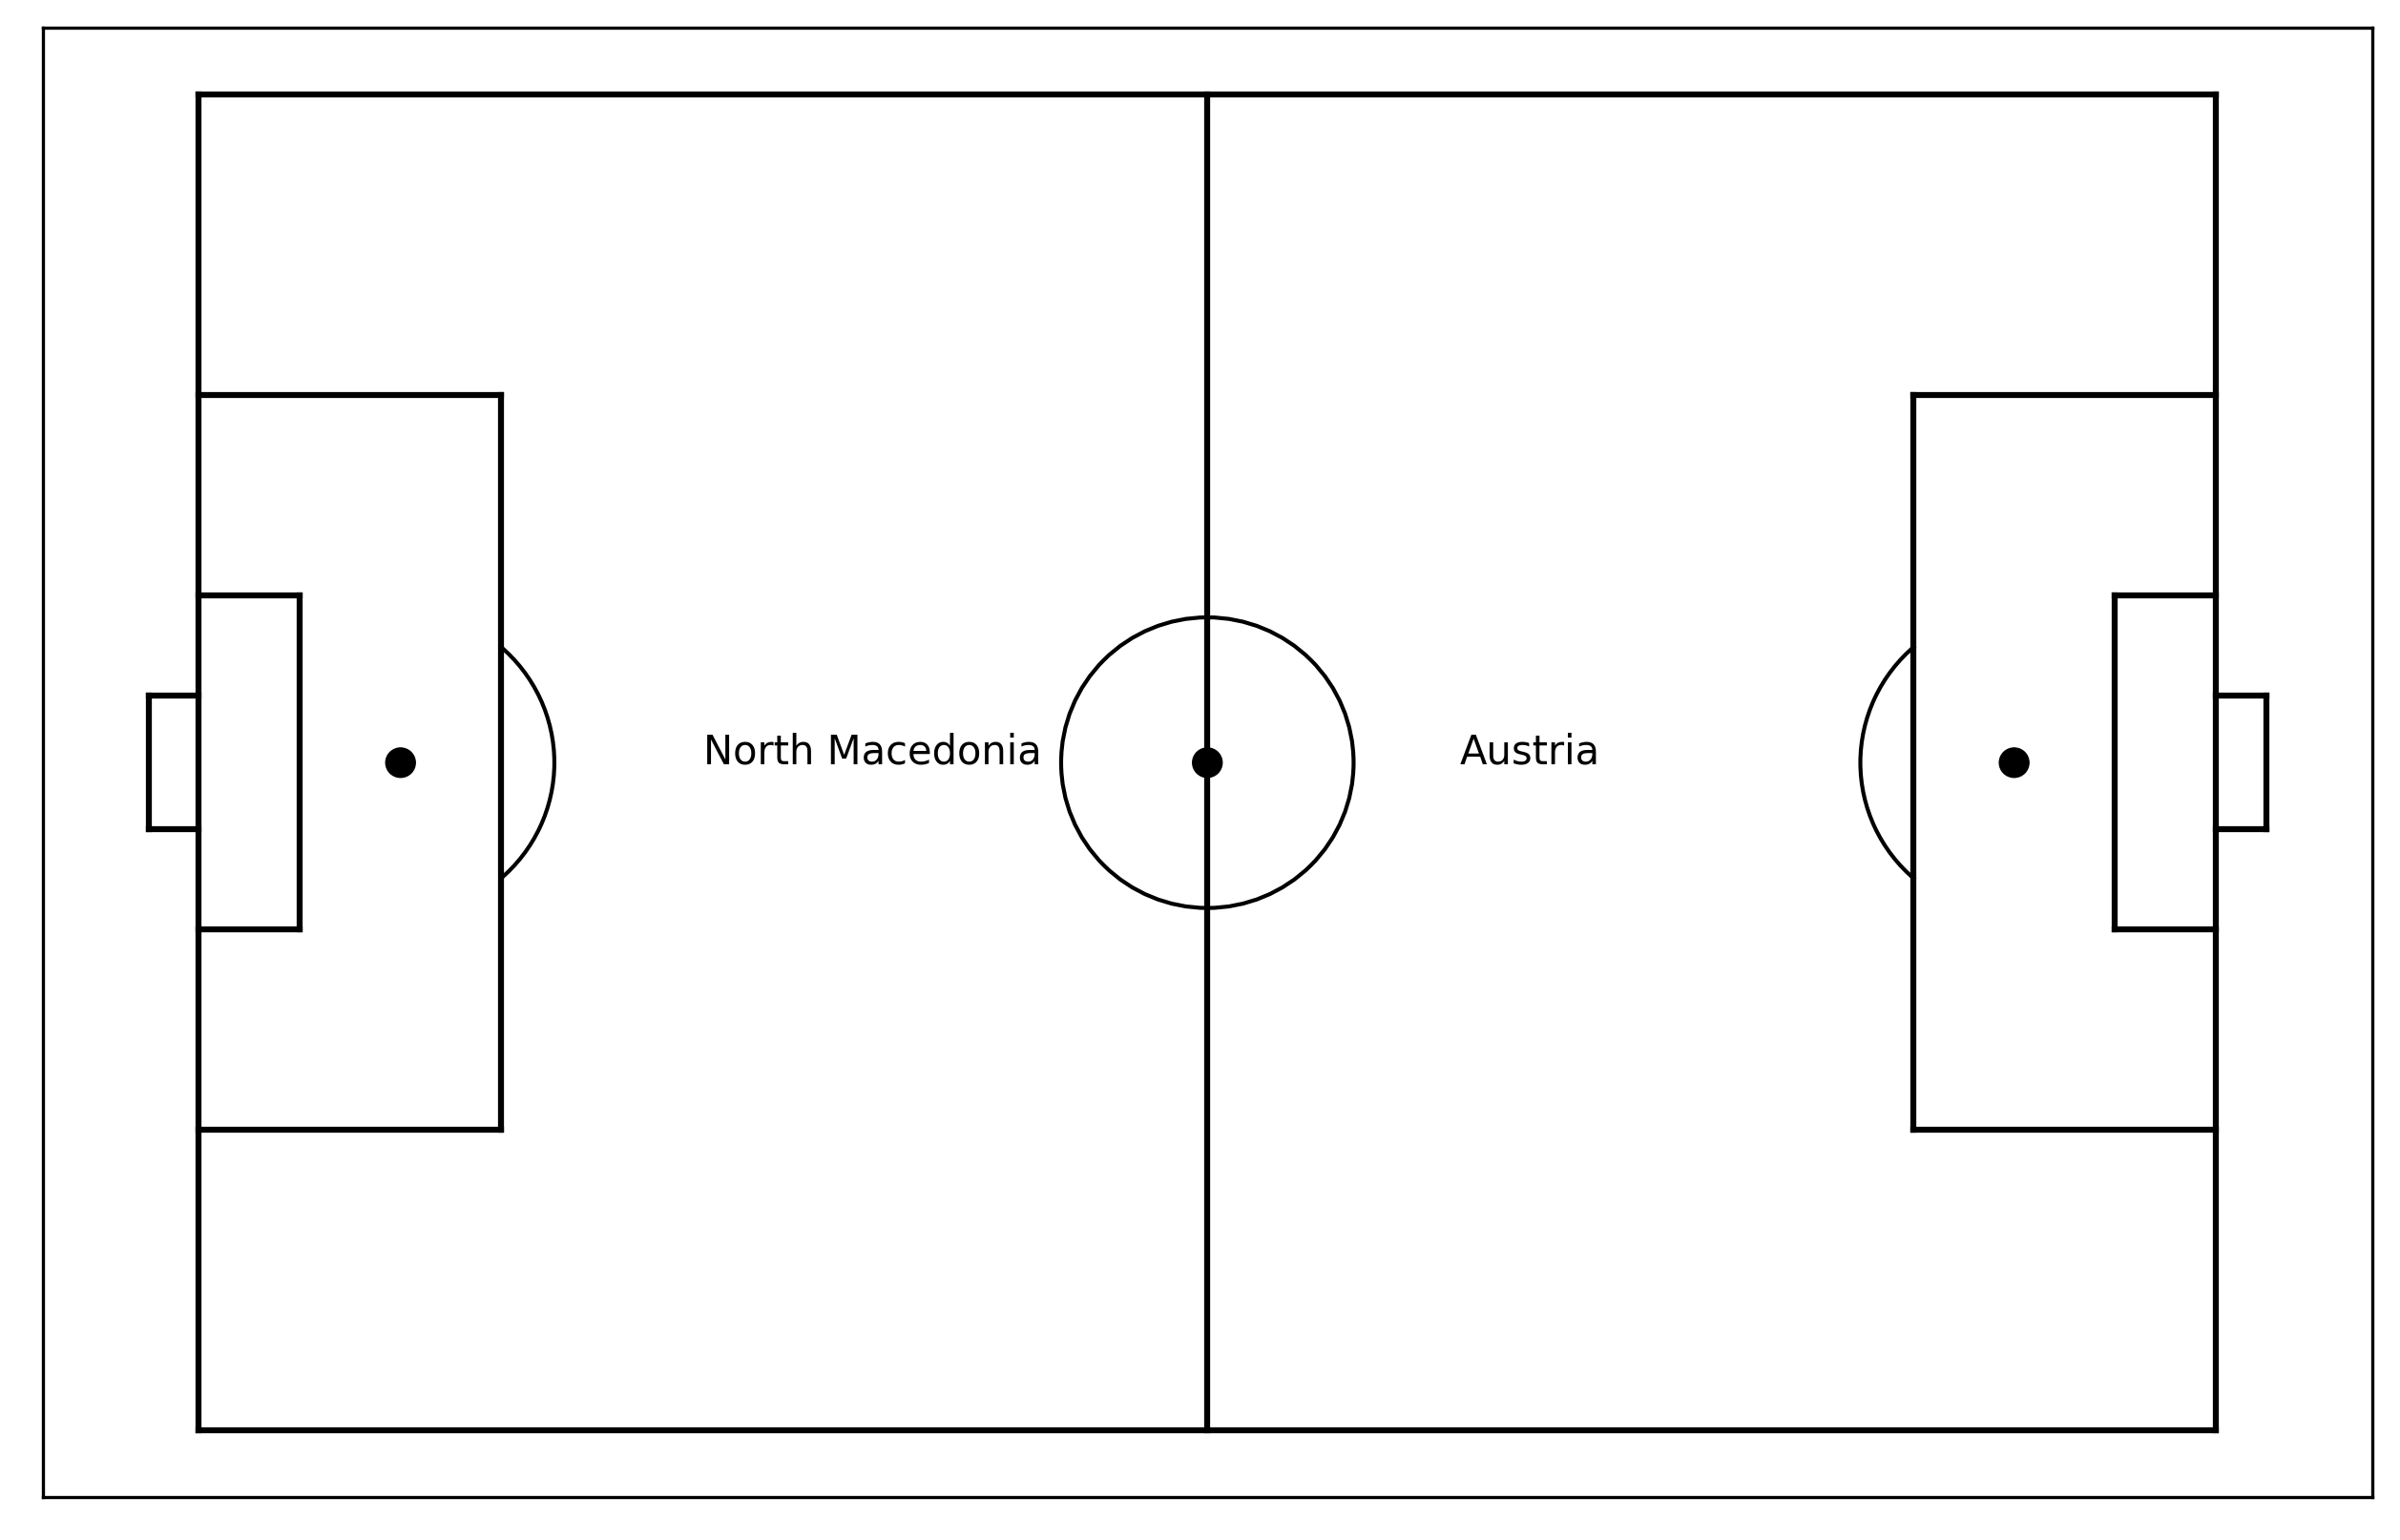

In [15]:
def plot_crosses(pitch, home_cross_coords, guest_cross_coords, home_team_name = "", guest_team_name = "", success_color="blue", failure_color="red"):
    pitch.plot(home_cross_coords[home_cross_coords["successful"] == 0]["x"], home_cross_coords[home_cross_coords["successful"] == 0]["y"], marker = "o", color=failure_color, linestyle = '')
    pitch.plot(home_cross_coords[home_cross_coords["successful"] == 1]["x"], home_cross_coords[home_cross_coords["successful"] == 1]["y"], marker = "o", color=success_color, linestyle = '')

    pitch.plot(120 - guest_cross_coords[guest_cross_coords["successful"] == 0]["x"], 80 - guest_cross_coords[guest_cross_coords["successful"] == 0]["y"], marker = "o", color=failure_color, linestyle = '')
    pitch.plot(120 - guest_cross_coords[guest_cross_coords["successful"] == 1]["x"], 80 - guest_cross_coords[guest_cross_coords["successful"] == 1]["y"], marker = "o", color=success_color, linestyle = '')

    pitch.text(30, 40, guest_team_name)
    pitch.text(75, 40, home_team_name)

pitch = draw_pitch()

df_events = json_to_normalized_dataframe('../data/statsbomb360/events/3788747.json')

crosses_austria_coords = get_cross_coordinates(df_events, "austria")
crosses_north_macedonia_coords = get_cross_coordinates(df_events, "north_macedonia")

plot_crosses(pitch, crosses_austria_coords, crosses_north_macedonia_coords, "Austria", "North Macedonia", success_color="orange", failure_color="grey")

plt.show()
